In [9]:
import os
import pandas as pd

def extract_data(base_dir):
    nested_dict = {}

    # Walk through the base directory
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.dat'):
                # Extract metadata from the folder and file structure
                path_parts = root.split(os.sep)
                folder_name = path_parts[-2]  # Parent folder containing metadata
                
                # Parse metadata from the folder name
                parts = folder_name.split('_')
                function_id = "".join([item.lower() for item in parts[-5].split('-')])  # E.g., "F-1"
                instance = parts[-4].split('-')[-1]  # E.g., "Id-0" -> "0"
                dimension = parts[-3].split('-')[-1]  # E.g., "Dim-2" -> "2"
                rep = parts[-2].split('-')[-1]  # E.g., "Rep-0" -> "0"

                # Read the .dat file
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path, delim_whitespace=True)

                # Extract relevant columns
                if all(col in df.columns for col in ['function evaluation', 'best-so-far f(x)', 'best af(x)+b']):
                    data = df[['function evaluation', 'best-so-far f(x)', 'best af(x)+b']].to_dict(orient='records')
                else:
                    print(f"Columns missing in {file_path}")
                    continue

                # Populate the nested dictionary
                nested_dict.setdefault(function_id, {}).setdefault(
                    dimension, {}).setdefault(instance, {}).setdefault(rep, data)

    return nested_dict

import numpy as np

def compute_averages(nested_data):
    """
    Given a nested dict structure of the form:
    nested_data[function_id][dimension][instance][rep] = list of dicts
    with keys ['function evaluation', 'best-so-far f(x)'],

    returns a nested dict with average, min, and max of best-so-far f(x)
    across instances/reps for each function_id and dimension.
    """
    avg_nested_dict = {}

    for function_id, dimensions in nested_data.items():
        avg_nested_dict[function_id] = {}
        for dimension, instances in dimensions.items():
            all_evals = []
            all_fx = []

            # Gather data from all instance/rep combinations
            for instance_data in instances.values():
                for rep_data in instance_data.values():
                    evals = [entry['function evaluation'] for entry in rep_data]
                    fx = [entry['best-so-far f(x)'] for entry in rep_data]

                    all_evals.append(evals)
                    all_fx.append(fx)

            # Convert to numpy arrays
            all_evals = np.array(all_evals)  # shape: (#runs, #iterations)
            all_fx = np.array(all_fx)        # shape: (#runs, #iterations)

            # Compute average, min, max across runs (axis=0)
            avg_evals = np.mean(all_evals, axis=0)
            avg_fx = np.mean(all_fx, axis=0)
            min_fx = np.min(all_fx, axis=0)
            max_fx = np.max(all_fx, axis=0)

            # Store in nested dict
            avg_nested_dict[function_id][dimension] = {
                "evaluations": avg_evals.tolist(),
                "fx_avg": avg_fx.tolist(),
                "fx_min": min_fx.tolist(),
                "fx_max": max_fx.tolist(),
            }

    return avg_nested_dict




In [10]:
base_directory = "PCABO"  # Replace with your actual path
nested_data = extract_data(base_directory)
PCABO_data = compute_averages(nested_data)

/tmp/ipykernel_3651972/330378738.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)
/tmp/ipykernel_3651972/330378738.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)
/tmp/ipykernel_3651972/330378738.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)
/tmp/ipykernel_3651972/330378738.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)
/tmp/ipykernel_3651972/330378738.py:24: FutureWarning: The '

In [11]:
PCABO_data

{'f12': {'10': {'evaluations': [1.0,
    2.0,
    3.0,
    4.0,
    5.0,
    6.0,
    7.0,
    8.0,
    9.0,
    10.0,
    11.0,
    12.0,
    13.0,
    14.0,
    15.0,
    16.0,
    17.0,
    18.0,
    19.0,
    20.0,
    21.0,
    22.0,
    23.0,
    24.0,
    25.0,
    26.0,
    27.0,
    28.0,
    29.0,
    30.0,
    31.0,
    32.0,
    33.0,
    34.0,
    35.0,
    36.0,
    37.0,
    38.0,
    39.0,
    40.0,
    41.0,
    42.0,
    43.0,
    44.0,
    45.0,
    46.0,
    47.0,
    48.0,
    49.0,
    50.0,
    51.0,
    52.0,
    53.0,
    54.0,
    55.0,
    56.0,
    57.0,
    58.0,
    59.0,
    60.0,
    61.0,
    62.0,
    63.0,
    64.0,
    65.0,
    66.0,
    67.0,
    68.0,
    69.0,
    70.0,
    71.0,
    72.0,
    73.0,
    74.0,
    75.0,
    76.0,
    77.0,
    78.0,
    79.0,
    80.0,
    81.0,
    82.0,
    83.0,
    84.0,
    85.0,
    86.0,
    87.0,
    88.0,
    89.0,
    90.0,
    91.0,
    92.0,
    93.0,
    94.0,
    95.0,
    96.0,
    97.0,
    98.0,
 

In [12]:
import os
import numpy as np

def extract_tables_from_dat(file_path):
    """
    Extract tables from the .dat file and return them as a list of tuple lists [(eval, val)].
    """
    tables = []
    current_table = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("evaluations raw_y"):
                if current_table:
                    tables.append(current_table)
                    current_table = []
            else:
                parts = line.strip().split()
                if len(parts) == 2:
                    eval_ = int(parts[0])
                    val_ = float(parts[1])
                    if len(current_table) != 0 and val_ > current_table[-1][1]:
                        val_ = current_table[-1][1]
                    current_table.append((eval_, val_))

    # Append the last table if not empty
    if current_table:
        tables.append(current_table)

    return tables

def fill_missing_values(tables):
    """
    Turn tuple lists into complete lists by filling in missing values.
    Missing values are filled with the previous value.
    """
    max_eval = max(max(eval_ for eval_, _ in table) for table in tables)
    filled_tables = []

    for table in tables:
        eval_to_val = {eval_: val_ for eval_, val_ in table}
        filled_table = []
        prev_val = None
        for eval_ in range(1, max_eval + 1):
            if eval_ in eval_to_val:
                prev_val = eval_to_val[eval_]
            filled_table.append(prev_val)
        filled_tables.append(filled_table)

    return list(range(1, max_eval + 1)), filled_tables

def average_min_max_filled_tables(filled_tables):
    """
    Returns average, min, and max for each evaluation index across runs.
    """
    array_ = np.array(filled_tables)  # shape: (num_runs, num_evals)
    avg_vals = np.mean(array_, axis=0)
    min_vals = np.min(array_, axis=0)
    max_vals = np.max(array_, axis=0)
    return avg_vals.tolist(), min_vals.tolist(), max_vals.tolist()

def process_file(file_path):
    """
    Process a single .dat file to get the evaluations and the avg, min, and max best-so-far f(x).
    """
    tables = extract_tables_from_dat(file_path)
    all_evals, filled_tables = fill_missing_values(tables)
    avg_vals, min_vals, max_vals = average_min_max_filled_tables(filled_tables)
    return all_evals, avg_vals, min_vals, max_vals

def process_directory(base_dir):
    """
    Process all .dat files in `base_dir` and return a nested dictionary:
      nested_dict[function_id][dimension] = {
          "evaluations": [...],
          "fx_avg": [...],
          "fx_min": [...],
          "fx_max": [...]
      }
    """
    nested_dict = {}

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.dat'):
                file_path = os.path.join(root, file)

                # Extract function ID and dimension from the file name
                # e.g., something like: run_f1_DIM2.dat
                parts = file.split('_')
                function_id = parts[1]  # f1
                dimension = parts[2].split('.')[0].replace("DIM", "")  # 2

                all_evals, avg_vals, min_vals, max_vals = process_file(file_path)

                nested_dict.setdefault(function_id, {})
                nested_dict[function_id][dimension] = {
                    "evaluations": all_evals,
                    "fx_avg": avg_vals,
                    "fx_min": min_vals,
                    "fx_max": max_vals,
                }
    return nested_dict


# Base directory path where the new data is located
base_directory = "ioh_data"  # Replace with your actual path
our_data = process_directory(base_directory)

# `nested_data` now contains the required structure


In [13]:
import matplotlib.pyplot as plt

def plot_results_comparison(
    avg_nested_dict1,
    avg_nested_dict2,
    label1="Dataset 1: Best-so-far f(x)",
    label2="Dataset 2: Best-so-far f(x)"
):
    """
    Plots avg, min, and max best-so-far f(x) for two datasets.
    Each dataset is padded to the same length, and min/max is shown as a shaded region.
    Uses blue for Dataset 1 and yellow for Dataset 2 with solid lines.
    """

    for function_id, dimensions1 in avg_nested_dict1.items():
        if function_id not in avg_nested_dict2:
            print(f"Function ID {function_id} not found in second dictionary.")
            continue

        dimensions2 = avg_nested_dict2[function_id]

        for dimension, data1 in dimensions1.items():
            if dimension not in dimensions2:
                print(f"Dimension {dimension} for Function ID {function_id} not found in second dictionary.")
                continue

            data2 = dimensions2[dimension]

            # --- Dataset 1 ---
            evals1 = data1["evaluations"]
            fx1_avg = data1["fx_avg"]
            fx1_min = data1["fx_min"]
            fx1_max = data1["fx_max"]

            # --- Dataset 2 ---
            evals2 = data2["evaluations"]
            fx2_avg = data2["fx_avg"]
            fx2_min = data2["fx_min"]
            fx2_max = data2["fx_max"]


            # --- Plotting ---
            plt.figure()

            # Dataset 1: Solid blue line + blue shading
            plt.plot(evals1, fx1_avg, color="blue", linestyle="-", label=f"{label1} (avg)")
            plt.fill_between(evals1, fx1_min, fx1_max, color="blue", alpha=0.2,
                             label=f"{label1} (min-max)")

            # Dataset 2: Solid yellow line + yellow shading
            plt.plot(evals2, fx2_avg, color="orange", linestyle="-", label=f"{label2} (avg)")
            plt.fill_between(evals2, fx2_min, fx2_max, color="orange", alpha=0.2,
                             label=f"{label2} (min-max)")

            plt.xlabel("Function Evaluations")
            plt.ylabel("Objective Value")
            plt.title(f"Function ID: {function_id}, Dimension: {dimension}")
            plt.legend(loc="upper right")
            plt.grid(True)
            plt.show()


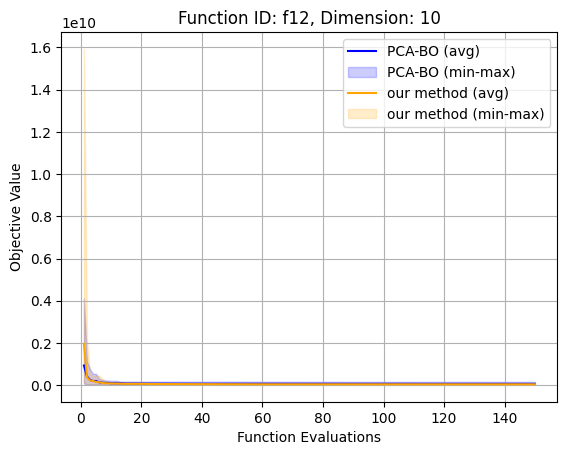

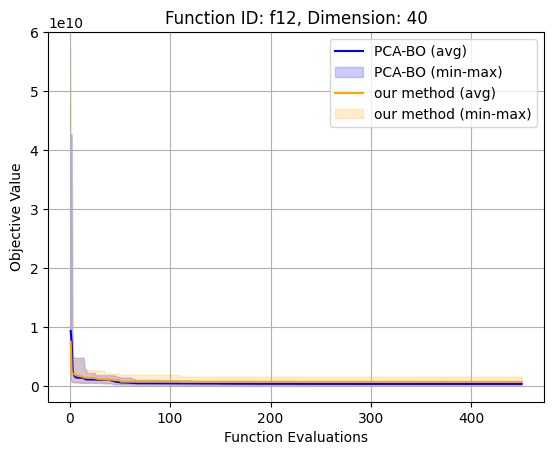

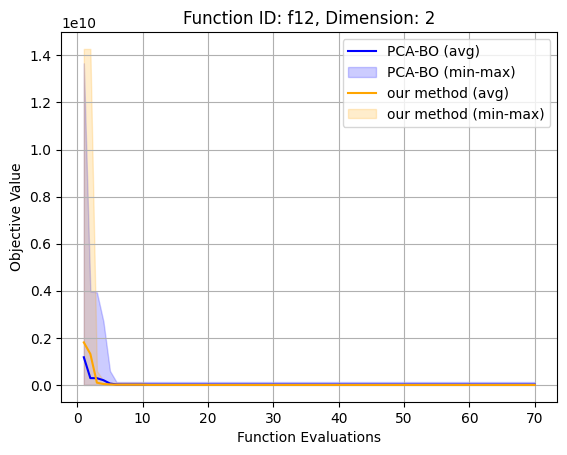

Dimension 100 for Function ID f12 not found in second dictionary.


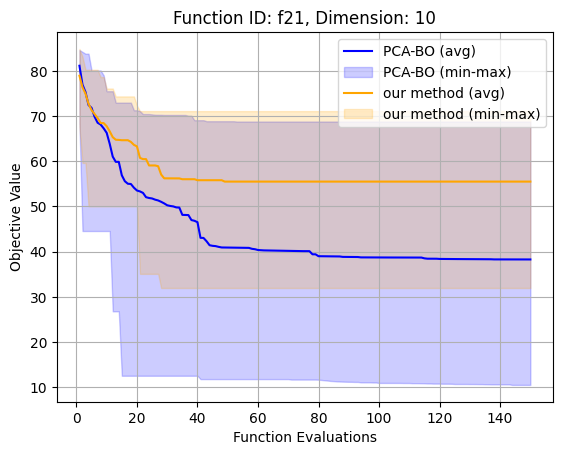

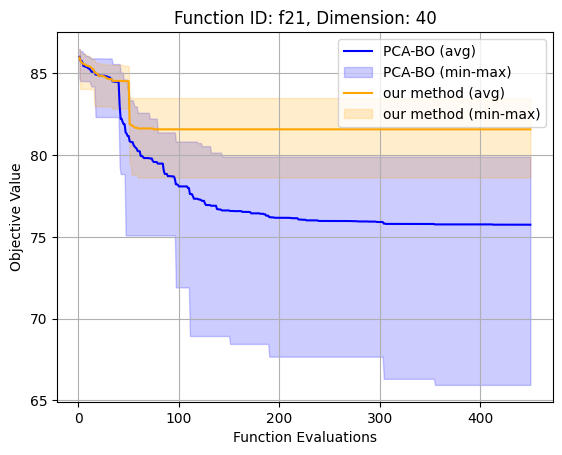

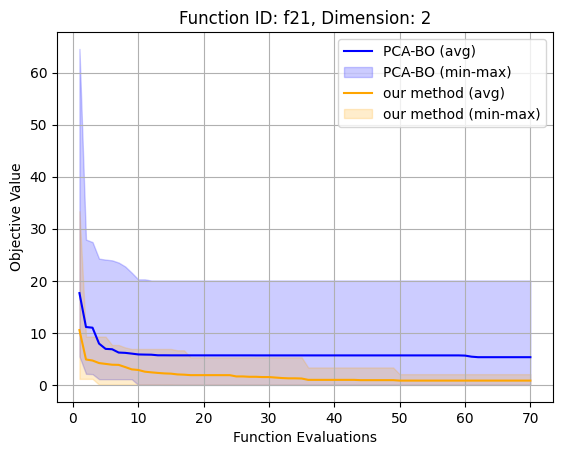

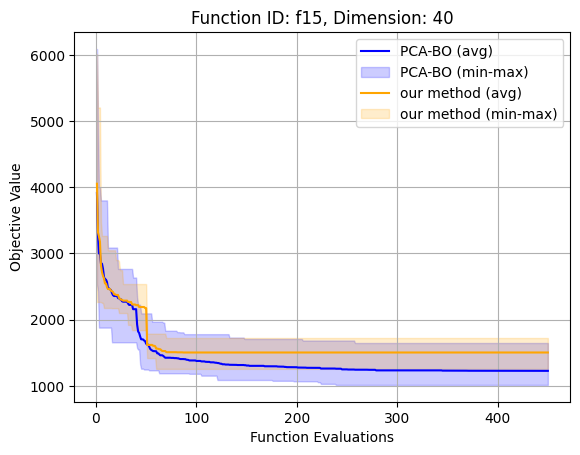

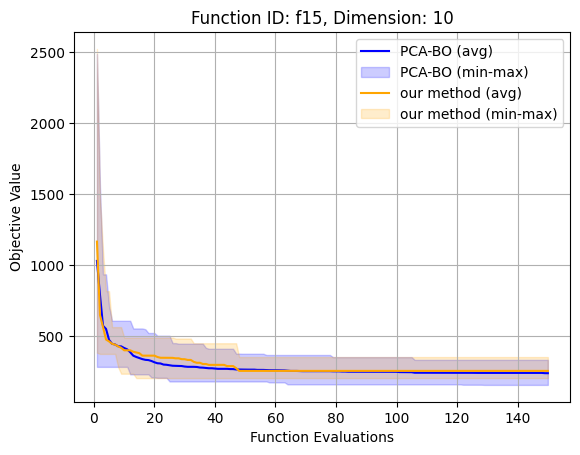

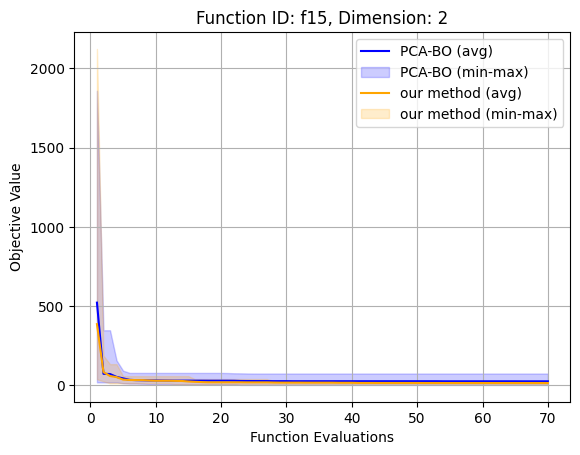

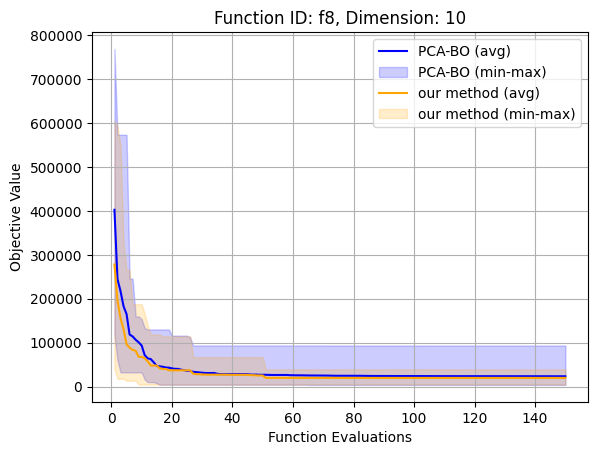

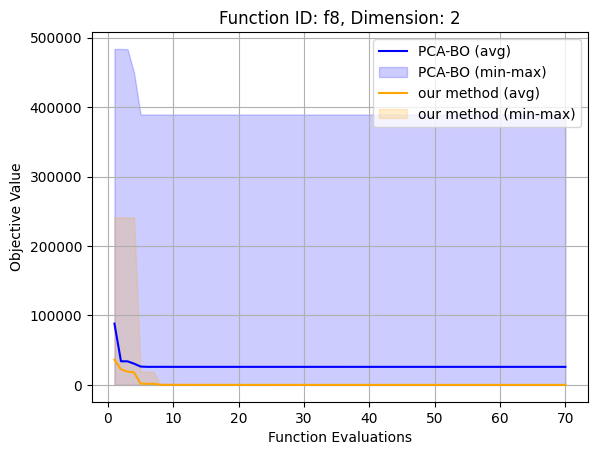

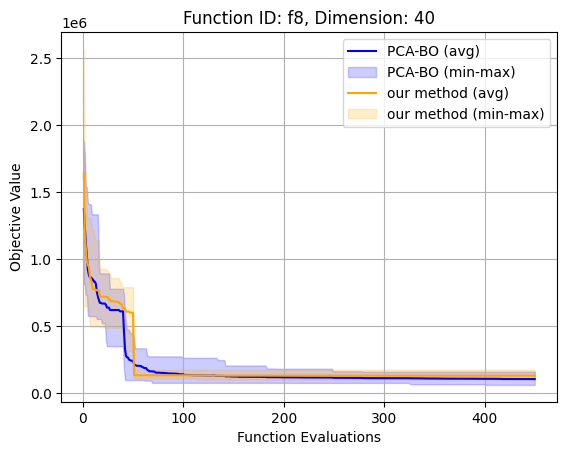

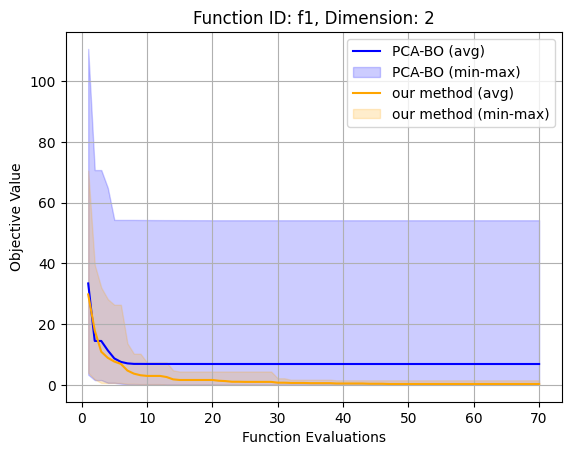

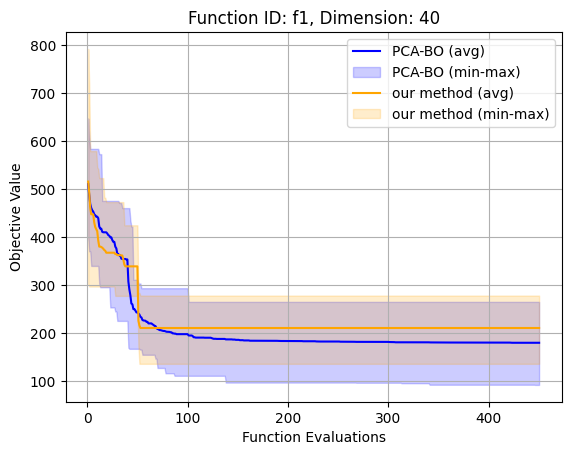

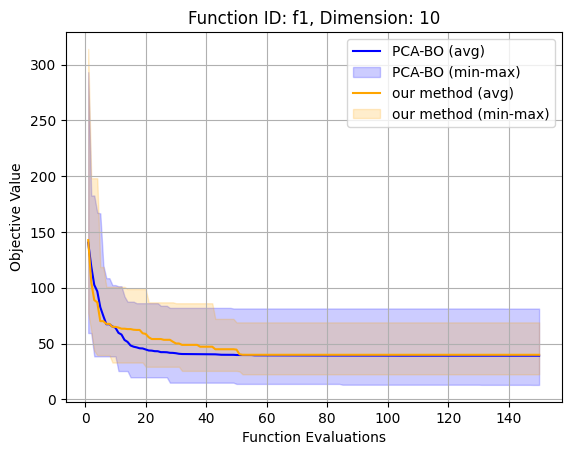

In [14]:
plot_results_comparison(PCABO_data, our_data, label1="PCA-BO", label2="our method")